# Quantity Analysis - Time Series

## Objective
Analyze and forecast **quantity trends** over time using time series analysis techniques.

## Dataset Overview
The dataset contains timestamped records of quantities sold or produced.

## Workflow
1. Load the data
2. Explore time-based patterns
3. Resample and smooth
4. Train a forecasting model
5. Visualize predictions

In [4]:
!pip install statsmodels


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 347.5 kB/s eta 0:00:27
   -- ------------------------------------- 0.5/9.8 MB 347.5 kB/s eta 0:00:27
   --- ------------------------------------ 0.8/9.8 MB 458.1 kB/s eta 0:00:20
   ----- ---------------------------------- 1.3/9.8 MB 761.4 kB/s eta 0:00:12
   ------- -------------------------------- 1.8/9.8 MB 1.0 MB/s eta 0:00:08
   ---------- ----------------------------- 2.6/9.8 MB 1.3 MB/s eta 0:00:06
   ------------- -------------------------- 3.4/9.8 MB 1.5 MB/s eta 0:00:05
   ------------------ --------------------- 4.5/9.8 MB 1.9 MB/s eta 0:00:03
   -------------------- ---------------


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
!pip install openpyxl



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")


In [11]:
# Load data from Excel file
file_path = r"C:\Users\MANSI\Downloads\downloaded-file\Raw Data_Predictive Analysis.xlsx"
df = pd.read_excel(file_path)


In [17]:
# Check shape and data types
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()


Shape: (40563, 9)

Data Types:
 OrderDate             datetime64[ns]
ParentProductIdNew             int64
ParentProductNew              object
ProductCategoryNew            object
ArtistNameNew                 object
total_qty_sales                int64
Selling Price                float64
productListViews             float64
productListClicks            float64
dtype: object


OrderDate                 0
ParentProductIdNew        0
ParentProductNew          0
ProductCategoryNew        0
ArtistNameNew             0
total_qty_sales           0
Selling Price             0
productListViews      14972
productListClicks     14972
dtype: int64

## Exploratory Data Analysis

In [19]:
# Convert 'OrderDate' to datetime format
df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')

# Sort data by date
df = df.sort_values(by='OrderDate')

# Set 'OrderDate' as index
df.set_index('OrderDate', inplace=True)

# Preview
df.head()




ParentProductIdNew ParentProductNew ProductCategoryNew  \
OrderDate                                                            
2019-01-01                  11       Product 11         Category 1   
2019-01-01                  60       Product 60         Category 4   
2019-01-01                 106      Product 106         Category 8   
2019-01-01                   4        Product 4         Category 1   
2019-01-01                  95       Product 95         Category 8   

           ArtistNameNew  total_qty_sales  Selling Price  productListViews  \
OrderDate                                                                    
2019-01-01         TSSOS                3     399.000000               NaN   
2019-01-01         TSSOS                8    1299.000000               NaN   
2019-01-01         TSSOS                1     549.000000               NaN   
2019-01-01         TSSDP                5     399.000000               NaN   
2019-01-01          TSSF               50     519.791667               NaN   

            productListClicks  
OrderDate                      
2019-01-01                NaN  
2019-01-01                NaN  
2019-01-01                NaN  
2019-01-01                NaN  
2019-01-01                NaN

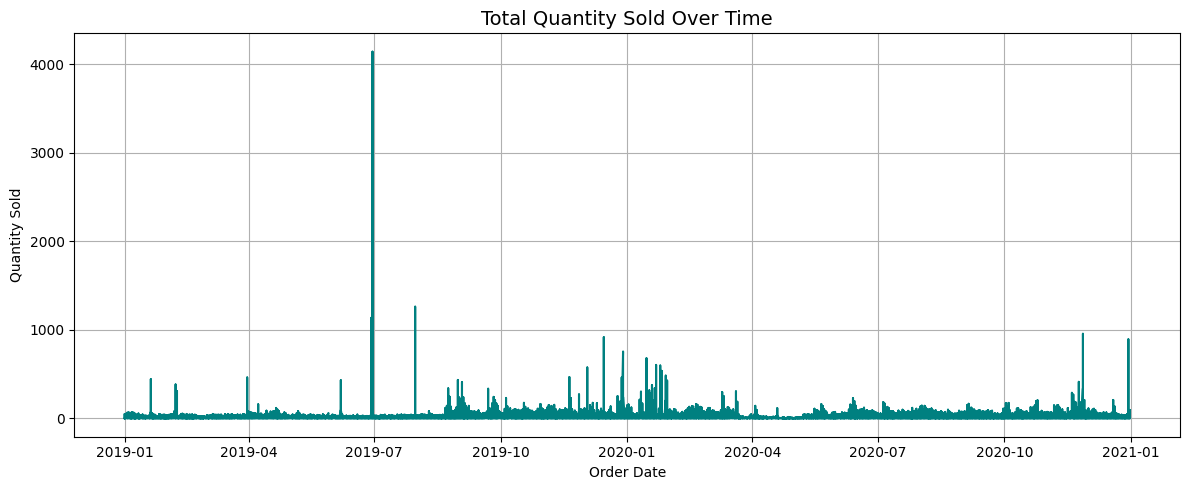

In [20]:
import matplotlib.pyplot as plt

# Plot total quantity sold over time
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['total_qty_sales'], color='teal')
plt.title("Total Quantity Sold Over Time", fontsize=14)
plt.xlabel("Order Date")
plt.ylabel("Quantity Sold")
plt.grid(True)
plt.tight_layout()
plt.show()


## Decomposition

C:\Users\MANSI\AppData\Local\Temp\ipykernel_26720\2700492987.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df['total_qty_sales'].resample('M').sum()


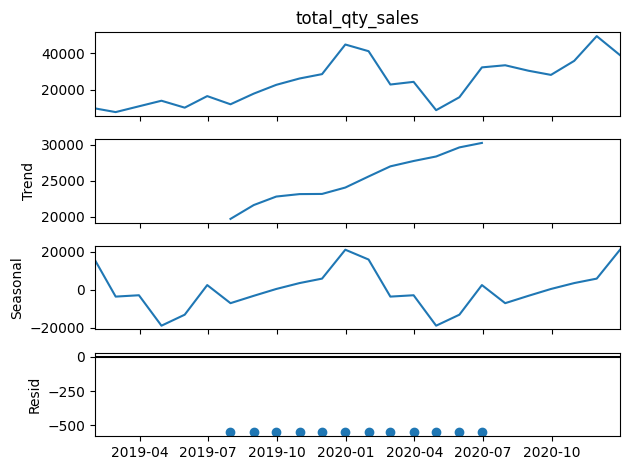

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Resample monthly for smoother decomposition
monthly_data = df['total_qty_sales'].resample('M').sum()

# Decompose with additive model
result = seasonal_decompose(monthly_data, model='additive', period=12)

# Plot the decomposition
result.plot()
plt.tight_layout()
plt.show()


In [22]:
from statsmodels.tsa.stattools import adfuller

# Drop NA and run ADF test
adf_test = adfuller(monthly_data.dropna())
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])


ADF Statistic: -1.9481104033731995
p-value: 0.3097776416882091


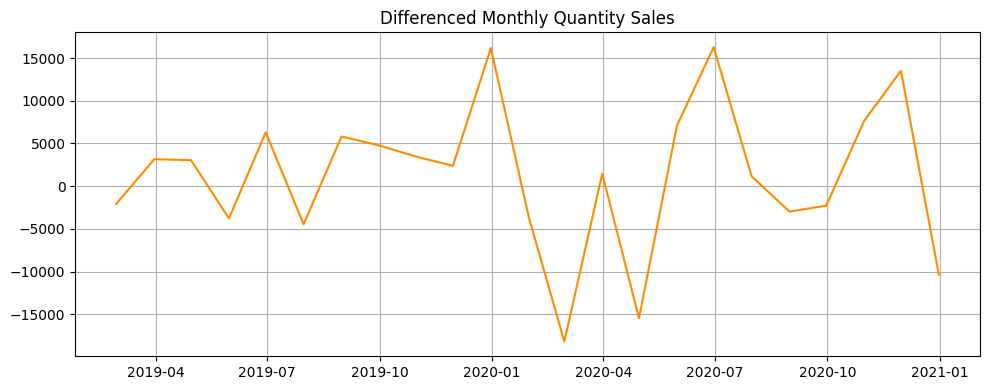

In [23]:
monthly_diff = monthly_data.diff().dropna()

# Plot differenced data
plt.figure(figsize=(10, 4))
plt.plot(monthly_diff, color='darkorange')
plt.title("Differenced Monthly Quantity Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


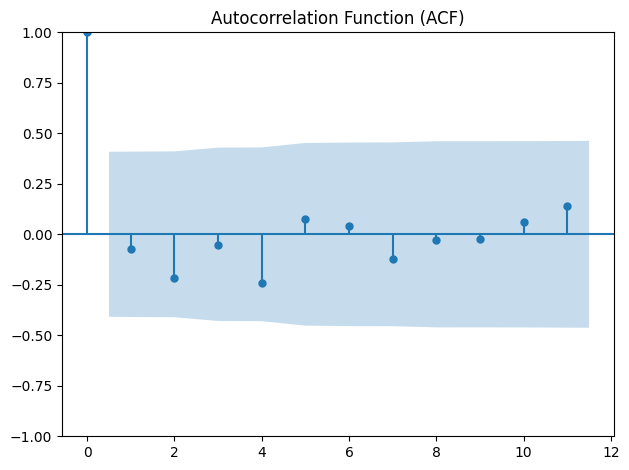

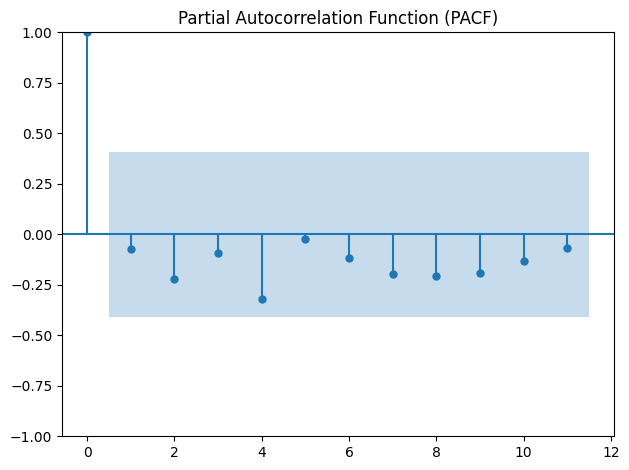

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Compute safe lag limit
max_lag = len(monthly_diff) // 2

# Plot ACF
plot_acf(monthly_diff, lags=max_lag)
plt.title("Autocorrelation Function (ACF)")
plt.tight_layout()
plt.show()

# Plot PACF
plot_pacf(monthly_diff, lags=max_lag, method='ywm')
plt.title("Partial Autocorrelation Function (PACF)")
plt.tight_layout()
plt.show()


## Modeling with ARIMA

In [26]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA (adjust order based on ACF/PACF)
model = ARIMA(monthly_data, order=(1, 1, 1))
result = model.fit()

# Summary
print(result.summary())


                               SARIMAX Results                                
Dep. Variable:        total_qty_sales   No. Observations:                   24
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -240.753
Date:                Sun, 22 Jun 2025   AIC                            487.506
Time:                        15:47:55   BIC                            490.912
Sample:                    01-31-2019   HQIC                           488.362
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6116      0.843      0.726      0.468      -1.041       2.264
ma.L1         -0.7716      0.621     -1.242      0.214      -1.989       0.446
sigma2      8.678e+07   1.23e-08   7.04e+15      0.0

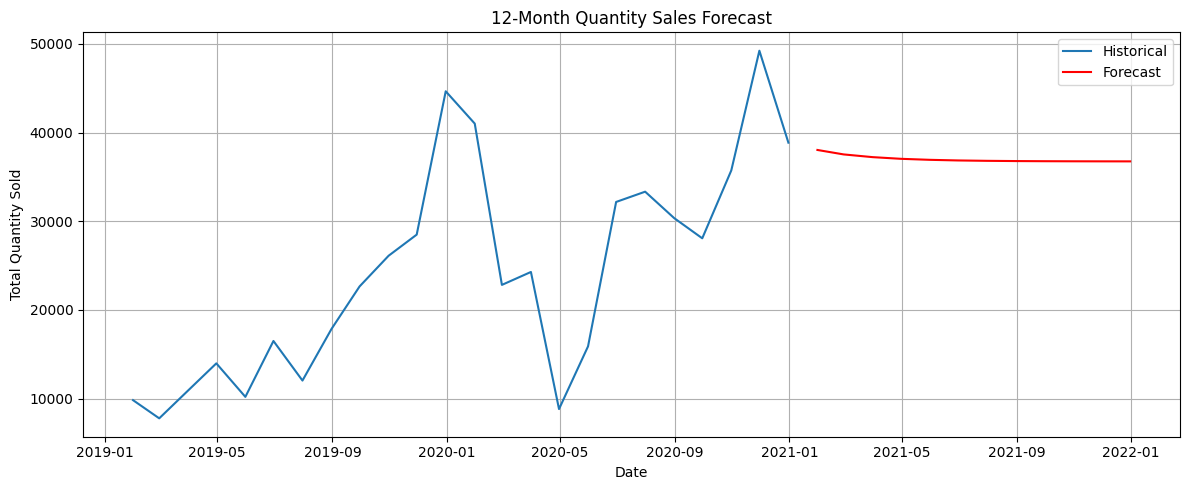

In [27]:
# Forecast next 12 months
forecast = result.forecast(steps=12)

# Plot original vs forecast
plt.figure(figsize=(12, 5))
plt.plot(monthly_data, label='Historical')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title("12-Month Quantity Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Total Quantity Sold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Evaluation and Visualization

MAE  : 14242.18
MSE  : 290946133.37
SMAPE: 43.71%


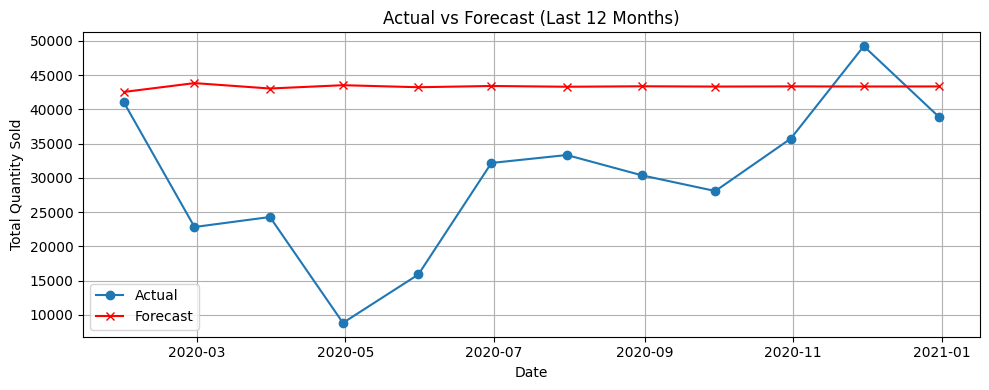

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

# Suppress warnings from statsmodels
warnings.filterwarnings("ignore")

# ---- Train-Test Split ----
train = monthly_data[:-12]
test = monthly_data[-12:]

# ---- Fit ARIMA Model ----
model = ARIMA(train, order=(1, 1, 1))  # Change order based on auto_arima if needed
result = model.fit()

# ---- Forecast Next 12 Points ----
forecast = result.forecast(steps=12)

# ---- Evaluation Metrics ----
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)

def smape(y_true, y_pred):
    return 100 / len(y_true) * np.sum(
        2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred))
    )

smape_val = smape(test.values, forecast.values)

print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"SMAPE: {smape_val:.2f}%")

# ---- Plot Forecast vs Actual ----
plt.figure(figsize=(10, 4))
plt.plot(test.index, test.values, label="Actual", marker='o')
plt.plot(test.index, forecast.values, label="Forecast", marker='x', color='red')
plt.title("Actual vs Forecast (Last 12 Months)")
plt.xlabel("Date")
plt.ylabel("Total Quantity Sold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Conclusion
- Time series modeling was applied to understand and forecast quantity trends.
- ARIMA provided a simple baseline.
- For improvement, consider SARIMA, Prophet, or LSTM for long-term patterns.